# SIR

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from scipy.integrate import solve_ivp

In [2]:
images_path = Path() / "images"
images_path.mkdir(parents=True, exist_ok=True)

In [3]:
def sir(t, y, beta, gamma):
  S, I, R = y
  return [
    -beta * S * I,
    beta * S * I - gamma * I,
    gamma * I
  ]

In [4]:
t_initial, t_final = 0, 21
S0, I0, R0 = 0.95, 0.05, 0.00

beta = 0.5
gamma = 1 / 7

Y0 = [S0, I0, R0]
t_span = (t_initial , t_final)
res = solve_ivp(sir, t_span, Y0, args=(beta, gamma), dense_output=True)
t = np.linspace(t_initial, t_final, 100)
y = res.sol(t)

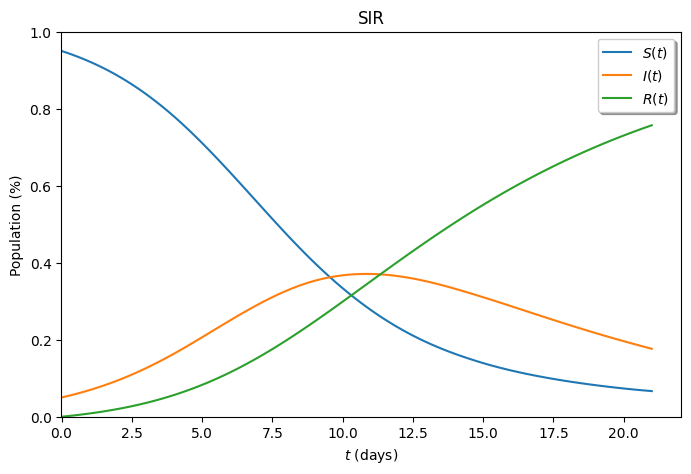

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(t, y.T, label=["$S(t)$", "$I(t)$", "$R(t)$"])
ax.legend(shadow=True)
ax.set_xlim(left=-0.01)
ax.set_ylim(0, 1)
ax.set_xlabel("$t$ (days)")
ax.set_ylabel("Population (%)")
ax.set_title("SIR")
fig.savefig(images_path / f"example_sir.png", dpi=300, bbox_inches="tight")